In [1]:
import warnings
warnings.filterwarnings("ignore")

In [322]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math
from math import log
from astropy.table import Table
import pyfits
from astropy.stats import median_absolute_deviation 

In [13]:
hdul = fits.open('New_Method.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux
Flux_g = data.field('gFApflux') # Obtain flux for g band
dc_major = data.field('DC_maj')
DC = array(dc_major)
lgz = data.field('LGZ_size')
LGZ = array(lgz)
L_low_f = data.field('NEWCOL1')

#### NEW ELEMENTS
U = data.field('gFApMag')
u = array(U)
W1 = data.field('w1Mag')
W2 = data.field('w2Mag')
W3 = data.field('w3Mag')



In [6]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [7]:
# Luminosity Distance
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm
Lum_dG = array(cosmo.luminosity_distance([Flux_g])*3.08567758e24) ### Last number converts it into cm

In [8]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-26/(1+z))
    return P
Pw22 = (power(Lum_d22,Flux_22,z))
Pw = power(Lum_d,flux_tot,z)

In [9]:
W1_mag = array(W1-2.699)
W2_mag  = array(W2-3.339)

In [14]:
diff1 = array(u-W3)
diff2 = array(W1_mag- W2_mag)
diff_14 = (diff2*1.4)+3.2
Tot_sources = np.vstack((L_low_f,z,diff1,diff2,diff_14,DC,LGZ)).T


In [91]:
def QSO(x,d1,d14,d2):
    qso = x[(d1 < d14) & (d2>0.7)]
    return array(qso)
QSO_tot = QSO(Tot_sources,diff1,diff_14,diff2)

In [92]:
def RG(x,d1,d14):
    rg = x[(d1 >= d14)]
    return array(rg)
RG_tot = RG(Tot_sources,diff1,diff_14)

In [93]:
RG_tot[:,5]

array([4.25476191, 2.1510252 ,        nan, ..., 3.8386689 , 8.60416052,
       5.57364652])

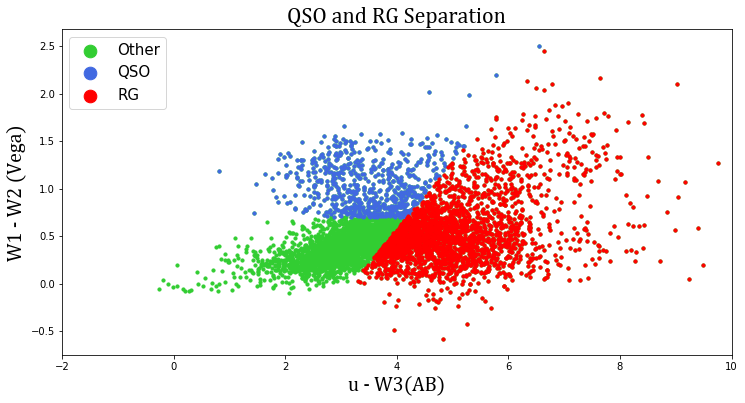

In [368]:
bsfont = {'fontname':'Cambria Math'}


f = plt.figure(figsize=(12,6))
plt.ylabel('W1 - W2 (Vega)', fontsize = 20,**bsfont)
plt.xlabel('u - W3(AB)', fontsize=20,**bsfont)

plt.title('QSO and RG Separation',fontsize=22,**bsfont)

plt.scatter((u-W3),(W1_mag- W2_mag),c='limegreen',s=10,label = 'Other')
plt.scatter(QSO_tot[:,2],QSO_tot[:,3],c='royalblue',s=10,label = 'QSO')
plt.scatter(RG_tot[:,2],RG_tot[:,3],c='red',s=10, label = 'RG')
plt.xlim(-2,10)
plt.legend(loc=2, prop={'size': 15},markerscale=4)
#plt.savefig('magnitude relation.png')
plt.show()

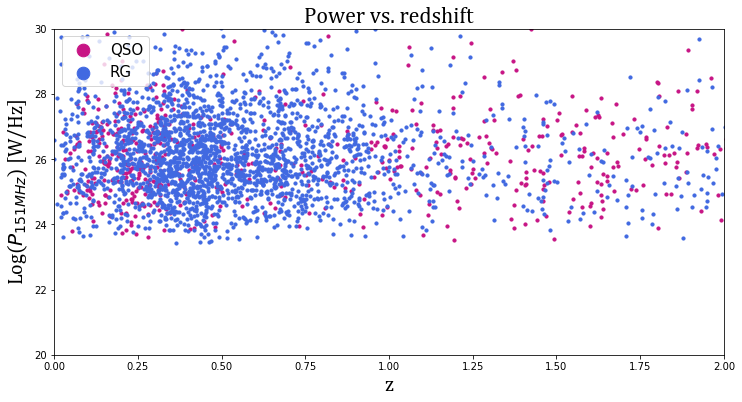

In [330]:
bsfont = {'fontname':'Cambria Math'}


f = plt.figure(figsize=(12,6))
plt.ylabel('Log($P_{151MHz}$) [W/Hz]', fontsize = 20,**bsfont)
plt.xlabel('z', fontsize=20,**bsfont)

plt.title('Power vs. redshift',fontsize=22,**bsfont)

plt.scatter(QSO_tot[:,1],np.log10(QSO_tot[:,0]),c='mediumvioletred',s=10,label = 'QSO')
plt.scatter(RG_tot[:,1],np.log10(RG_tot[:,0]),c='royalblue',s=10, label = 'RG')
plt.legend(loc=2, prop={'size': 15},markerscale=4)
plt.xlim(0,2)
plt.ylim(20,30)
plt.savefig('NEW_p vs z.png')
plt.show()

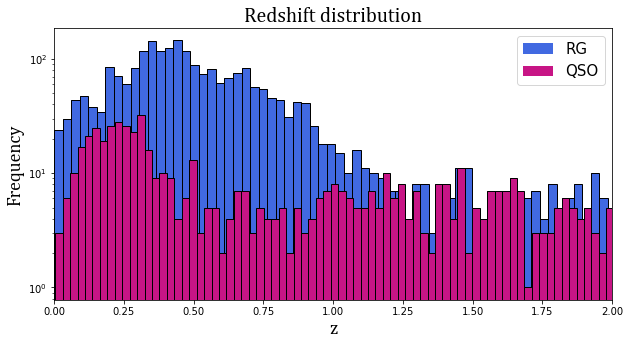

In [329]:
d

In [59]:
DC_QSO = np.nan_to_num(QSO_tot[:,5])
LGZ_QSO = np.nan_to_num(QSO_tot[:,6])

DC_RG = np.nan_to_num(RG_tot[:,5]*2)
LGZ_RG = np.nan_to_num(RG_tot[:,6])

In [60]:
for i in np.arange(len(DC_QSO)):
    if (LGZ_QSO[i]==0):
        print (DC_QSO)
    else:
        DC_QSO[i] = LGZ_QSO[i]

[ 0.          0.          0.          0.          3.81699511  0.
  0.          2.79224579  3.30694133  2.23871848  0.          0.
  7.01690755  0.          6.09774805  0.          1.74503382  0.
  0.          2.30018825  2.98312426  0.          0.          0.
  3.23813378  4.54039548  3.49666378  3.39605275  0.          8.12902369
  4.08016797  4.40562154  8.53881253  6.21876777  0.          6.64579652
  3.38394808  1.55323907  0.          2.28094155  7.61324606  0.
  5.2042652   0.          3.7485931  20.0636929  11.94906598  0.
  0.          0.          0.          0.          0.          0.
  4.14483348  0.          4.01656138  0.          4.76536148  4.84701985
  3.78207853  0.          2.43298437  3.90108501  0.          0.
  0.          2.0594566   0.          2.07690686  2.27166007  0.
  3.19015653  2.54424846  4.32693278  3.02657147  4.18821603  4.12759732
  0.          0.          3.89267387  0.          0.          3.09355839
  3.11094183  3.72687604  2.6113048   8.08973548 1

In [61]:
for i in np.arange(len(DC_RG)):
    if (LGZ_RG[i]==0):
        print (DC_RG)
    else:
        DC_RG[i] = LGZ_RG[i]

[ 8.50952382  4.30205041  0.         ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041  0.         ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041 32.39503618 ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041 32.39503618 ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041 32.39503618 ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041 32.39503618 ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041 32.39503618 ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041 32.39503618 ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041 32.39503618 ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041 32.39503618 ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041 32.39503618 ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041 32.39503618 ...  7.67733781 17.20832105
 11.14729304]
[ 8.50952382  4.30205041 32.39503618 ...  7.67733781

In [62]:
ad_QSO = array(cosmo.angular_diameter_distance(QSO_tot[:,1])) #This is in Kiloparsecs
ad_RG = array(cosmo.angular_diameter_distance(RG_tot[:,1]))

def LZ(ang_d,dc):
    linear_size = ang_d*dc*(np.pi/180)
    return linear_size

#a = DC_MAJ[DC_MAJ != 0]
#b = DC_RG[DC_RG != 0]


L_QSO = array(LZ(ad_QSO,DC_QSO))
L_RG = array(LZ(ad_RG,DC_RG))

L_qso = L_QSO[L_QSO != 0]
L_rg = L_RG[L_RG != 0]

In [122]:
def Box(x,z,mn,mx,P,Mn,Mx,n):
    cat = x[(z >= mn) & (z <= mx) & (P >= Mn) & (P <= Mx)]
    return array(cat[:,n])


In [129]:
P_rg = RG_tot[:,0]
z_rg = RG_tot[:,1]

P_qso = QSO_tot[:,0]
z_qso = QSO_tot[:,1]

Tot_rg = np.vstack((z_rg,P_rg,L_RG)).T
Tot_qso = np.vstack((z_qso,P_qso,L_QSO)).T

In [175]:
Box(Tot_rg,z_rg,1.75,2.00,P_rg,1e28,1e30,2).shape

(4,)

In [176]:
Box(Tot_qso,z_qso,1.75,2.00,P_qso,1e28,1e30,2).shape

(6,)

In [134]:
131/56

2.3392857142857144

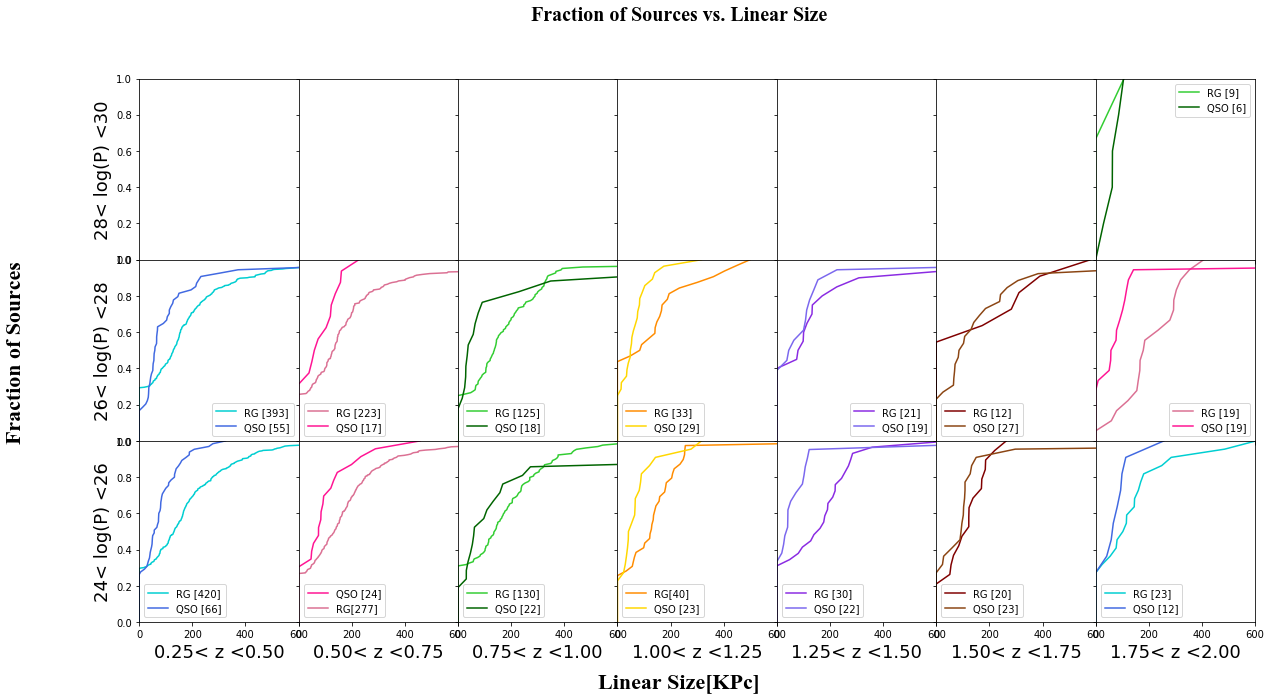

In [333]:
csfont = {'fontname':'Times New Roman'}

fig, axes  = plt.subplots(nrows=3, ncols=7, sharex=True, sharey=True,figsize = (20,10))
axes[2,0].plot(Box(Tot_rg,z_rg,0.25,0.50,P_rg,1e24,1e26,2),np.linspace(0,1.0,num=420), c = 'darkturquoise', label = 'RG [420]')
axes[2,0].plot(Box(Tot_qso,z_qso,0.25,0.50,P_qso,1e24,1e26,2),np.linspace(0,1.0,num=66), c='royalblue',label='QSO [66]')
axes[2,0].legend()
axes[2,0].set_xlabel('0.25< z <0.50',fontsize=18)
axes[2,0].set_ylabel('24< log(P) <26',fontsize=18)
axes[2,0].set_xlim(0,500)

axes[2,1].plot(Box(Tot_qso,z_qso,0.5,0.75,P_qso,1e24,1e26,2),np.linspace(0,1.0,num=24), c='deeppink',label='QSO [24]')
axes[2,1].plot(Box(Tot_rg,z_rg,0.5,0.75,P_rg,1e24,1e26,2),np.linspace(0,1.0,num=277), c = 'palevioletred', label = 'RG[277]')
axes[2,1].legend()
axes[2,1].set_xlabel('0.50< z <0.75',fontsize=18)

axes[2,2].plot(Box(Tot_rg,z_rg,0.75,1.0,P_rg,1e24,1e26,2),np.linspace(0,1.0,num=130), c = 'limegreen', label = 'RG [130]')
axes[2,2].plot(Box(Tot_qso,z_qso,0.75,1.00,P_qso,1e24,1e26,2),np.linspace(0,1.0,num=22), c='darkgreen',label='QSO [22]')
axes[2,2].legend()
axes[2,2].set_xlabel('0.75< z <1.00',fontsize=18)

axes[2,3].plot(Box(Tot_rg,z_rg,1.00,1.25,P_rg,1e24,1e26,2),np.linspace(0,1.0,num=40), c = 'darkorange', label = 'RG[40]')
axes[2,3].plot(Box(Tot_qso,z_qso,1.00,1.25,P_qso,1e24,1e26,2),np.linspace(0,1.0,num=23), c='gold',label='QSO [23]')
axes[2,3].legend()
axes[2,3].set_xlabel('1.00< z <1.25',fontsize=18)

axes[2,4].plot(Box(Tot_rg,z_rg,1.25,1.5,P_rg,1e24,1e26,2),np.linspace(0,1.0,num=30), c = 'blueviolet', label = 'RG [30]')
axes[2,4].plot(Box(Tot_qso,z_qso,1.25,1.5,P_qso,1e24,1e26,2),np.linspace(0,1.0,num=22), c='mediumslateblue',label='QSO [22]')
axes[2,4].legend()
axes[2,4].set_xlabel('1.25< z <1.50',fontsize=18)

axes[2,5].plot(Box(Tot_rg,z_rg,1.5,1.75,P_rg,1e24,1e26,2),np.linspace(0,1.0,num=20), c = 'maroon', label = 'RG [20]')
axes[2,5].plot(Box(Tot_qso,z_qso,1.5,1.75,P_qso,1e24,1e26,2),np.linspace(0,1.0,num=23), c='saddlebrown',label='QSO [23]')
axes[2,5].legend()
axes[2,5].set_xlabel('1.50< z <1.75',fontsize=18)

axes[2,6].plot(Box(Tot_rg,z_rg,1.75,2.00,P_rg,1e24,1e26,2),np.linspace(0,1.0,num=23), c = 'darkturquoise', label = 'RG [23]')
axes[2,6].plot(Box(Tot_qso,z_qso,1.75,2.00,P_qso,1e24,1e26,2),np.linspace(0,1.0,num=12), c='royalblue',label='QSO [12]')
axes[2,6].legend()
axes[2,6].set_xlabel('1.75< z <2.00',fontsize=18)

axes[1,0].plot(Box(Tot_rg,z_rg,0.25,0.50,P_rg,1e26,1e28,2),np.linspace(0,1.0,num=393), c = 'darkturquoise', label = 'RG [393]')
axes[1,0].plot(Box(Tot_qso,z_qso,0.25,0.50,P_qso,1e26,1e28,2),np.linspace(0,1.0,num=55), c='royalblue',label='QSO [55]')
axes[1,0].legend()
axes[1,0].set_ylabel('26< log(P) <28',fontsize=18)


axes[1,1].plot(Box(Tot_rg,z_rg,0.5,0.75,P_rg,1e26,1e28,2),np.linspace(0,1.0,num=223), c = 'palevioletred', label = 'RG [223]')
axes[1,1].plot(Box(Tot_qso,z_qso,0.5,0.75,P_qso,1e26,1e28,2),np.linspace(0,1.0,num=17), c='deeppink',label='QSO [17]')
axes[1,1].legend()

axes[1,2].plot(Box(Tot_rg,z_rg,0.75,1.0,P_rg,1e26,1e28,2),np.linspace(0,1.0,num=125), c = 'limegreen', label = 'RG [125]')
axes[1,2].plot(Box(Tot_qso,z_qso,0.75,1.0,P_qso,1e26,1e28,2),np.linspace(0,1.0,num=18), c='darkgreen',label='QSO [18]')
axes[1,2].legend()

axes[1,3].plot(Box(Tot_rg,z_rg,1.0,1.25,P_rg,1e26,1e28,2),np.linspace(0,1.0,num=33), c = 'darkorange', label = 'RG [33]')
axes[1,3].plot(Box(Tot_qso,z_qso,1.0,1.25,P_qso,1e26,1e28,2),np.linspace(0,1.0,num=29), c='gold',label='QSO [29]')
axes[1,3].legend()

axes[1,4].plot(Box(Tot_rg,z_rg,1.25,1.5,P_rg,1e26,1e28,2),np.linspace(0,1.0,num=21), c = 'blueviolet', label = 'RG [21]')
axes[1,4].plot(Box(Tot_qso,z_qso,1.25,1.5,P_qso,1e26,1e28,2),np.linspace(0,1.0,num=19), c='mediumslateblue',label='QSO [19]')
axes[1,4].legend(loc=4)

axes[1,5].plot(Box(Tot_rg,z_rg,1.5,1.75,P_rg,1e26,1e28,2),np.linspace(0,1.0,num=12), c = 'maroon', label = 'RG [12]')
axes[1,5].plot(Box(Tot_qso,z_qso,1.5,1.75,P_qso,1e26,1e28,2),np.linspace(0,1.0,num=27), c='saddlebrown',label='QSO [27]')
axes[1,5].legend()

axes[1,6].plot(Box(Tot_rg,z_rg,1.75,2.00,P_rg,1e26,1e28,2),np.linspace(0,1.0,num=19),c = 'palevioletred', label = 'RG [19]')
axes[1,6].plot(Box(Tot_qso,z_qso,1.75,2.00,P_qso,1e26,1e28,2),np.linspace(0,1.0,num=19), c='deeppink',label='QSO [19]')
axes[1,6].legend()

axes[0,6].plot(Box(Tot_rg,z_rg,1.75,2.00,P_rg,1e28,1e30,2),np.linspace(0,1.0,num=4), c = 'limegreen', label = 'RG [9]')
axes[0,6].plot(Box(Tot_qso,z_qso,1.75,2.00,P_qso,1e28,1e30,2),np.linspace(0,1.0,num=6), c='darkgreen',label='QSO [6]')
axes[0,6].set_xlim(0,600)
axes[0,6].legend()

axes[0,0].set_ylabel('28< log(P) <30',fontsize=18)
plt.ylim(0,1)

plt.subplots_adjust(wspace=0,hspace=0)
fig.text(0.5, 0.04, 'Linear Size[KPc]', va='center', ha='center',fontsize=22,**csfont)
fig.text(0.04, 0.5, 'Fraction of Sources', va='center', ha='center', rotation='vertical',fontsize=22,**csfont)
plt.suptitle('Fraction of Sources vs. Linear Size', fontsize=20,**csfont)
plt.savefig('NEW_CDF.png')
plt.show()


In [187]:
print(np.median(Box(Tot_rg,z_rg,0.25,0.50,P_rg,1e24,1e26,2))/np.median(Box(Tot_qso,z_qso,0.25,0.50,P_qso,1e24,1e26,2)),
     np.median(Box(Tot_rg,z_rg,0.50,0.75,P_rg,1e24,1e26,2))/np.median(Box(Tot_qso,z_qso,0.50,0.75,P_qso,1e24,1e26,2)),
     np.median(Box(Tot_rg,z_rg,0.75,1.00,P_rg,1e24,1e26,2))/np.median(Box(Tot_qso,z_qso,0.75,1.00,P_qso,1e24,1e26,2)),
     np.median(Box(Tot_rg,z_rg,1.00,1.25,P_rg,1e24,1e26,2))/np.median(Box(Tot_qso,z_qso,1.00,1.25,P_qso,1e24,1e26,2)),
     np.median(Box(Tot_rg,z_rg,1.25,1.50,P_rg,1e24,1e26,2))/np.median(Box(Tot_qso,z_qso,1.25,1.50,P_qso,1e24,1e26,2)),
     np.median(Box(Tot_rg,z_rg,1.5,1.75,P_rg,1e24,1e26,2))/np.median(Box(Tot_qso,z_qso,1.5,1.75,P_qso,1e24,1e26,2)),
     np.median(Box(Tot_rg,z_rg,1.75,2.0,P_rg,1e24,1e26,2))/np.median(Box(Tot_qso,z_qso,1.75,2.00,P_qso,1e24,1e26,2)))

2.3074112032141216 1.7915793166138392 2.2598799497322357 3.012376488548977 4.266038497204902 1.173858441568804 1.6400787589757517


In [188]:
print(np.median(Box(Tot_rg,z_rg,0.25,0.50,P_rg,1e26,1e28,2))/np.median(Box(Tot_qso,z_qso,0.25,0.50,P_qso,1e26,1e28,2)),
     np.median(Box(Tot_rg,z_rg,0.50,0.75,P_rg,1e26,1e28,2))/np.median(Box(Tot_qso,z_qso,0.50,0.75,P_qso,1e26,1e28,2)),
     np.median(Box(Tot_rg,z_rg,0.75,1.00,P_rg,1e26,1e28,2))/np.median(Box(Tot_qso,z_qso,0.75,1.00,P_qso,1e26,1e28,2)),
     np.median(Box(Tot_rg,z_rg,1.00,1.25,P_rg,1e26,1e28,2))/np.median(Box(Tot_qso,z_qso,1.00,1.25,P_qso,1e26,1e28,2)),
     np.median(Box(Tot_rg,z_rg,1.25,1.50,P_rg,1e26,1e28,2))/np.median(Box(Tot_qso,z_qso,1.25,1.50,P_qso,1e26,1e28,2)),
     np.median(Box(Tot_rg,z_rg,1.5,1.75,P_rg,1e26,1e28,2))/np.median(Box(Tot_qso,z_qso,1.5,1.75,P_qso,1e26,1e28,2)),
     np.median(Box(Tot_rg,z_rg,1.75,2.0,P_rg,1e26,1e28,2))/np.median(Box(Tot_qso,z_qso,1.75,2.00,P_qso,1e26,1e28,2)))

2.170986137071835 2.2277563100157747 3.7203599207611058 1.7258148040623467 1.7788569761349227 0.0 3.1168425793338184


In [191]:
print(np.median(L_28)/np.median(Box(Tot_qso,z_qso,1.75,2.00,P_qso,1e28,1e30,2)))

1.6999013443157414


In [192]:
a28 = Box(Tot_rg,z_rg,1.75,2.0,P_rg,1e28,1e30,2)
L_28 = a28[a28 != 0]

a26 = Box(Tot_rg,z_rg,1.5,1.75,P_rg,1e26,1e28,2)
L_26 = a26[a26 != 0]

In [193]:
print(np.median(L_26)/np.median(Box(Tot_qso,z_qso,1.5,1.75,P_qso,1e26,1e28,2)))

3.635306319617408


# Linear Size Ratio

In [203]:
Ratio1 = array([2.3074112032141216,1.7915793166138392,2.2598799497322357,3.012376488548977,4.266038497204902,1.173858441568804,1.6400787589757517])
Ratio2  = array([2.170986137071835,2.2277563100157747,3.7203599207611058,1.7258148040623467,1.7788569761349227,3.635306319617408,3.1168425793338184])
Ratio3 = array([3.635306319617408])





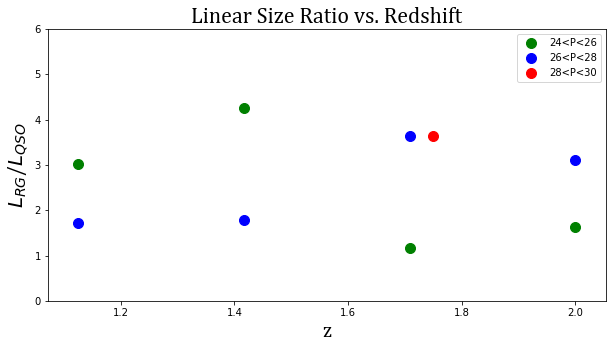

In [335]:
f = plt.figure(figsize=(10,5))

plt.scatter(ZZ,ratio1,c='green',s=100, label = '24<P<26')
plt.scatter(ZZ,ratio2,c='blue',s=100,label = '26<P<28')
plt.scatter(1.75,Ratio3,c='red',s=100, label = '28<P<30')
plt.ylabel('$L_{RG}$/$L_{QSO}$', fontsize = 20,**bsfont)
plt.xlabel('z', fontsize=20,**bsfont)
plt.title('Linear Size Ratio vs. Redshift',fontsize=22,**bsfont)
plt.ylim(0,6)
plt.legend()
plt.savefig('L vs. z:method2.png')
plt.show()

In [272]:
ratio1 = array([3.012376488548977,4.266038497204902,1.173858441568804,1.6400787589757517])
ratio2  = array([1.7258148040623467,1.7788569761349227,3.635306319617408,3.1168425793338184])
ratio3 = array([3.635306319617408])

P24 = array([5.05e+25, 2.0e+25, 8.35e+25,1.00e+26])
P26 = array([5.05e+27, 2.70e+27, 7.35e+27,1.00e+28])
ZZ = array([1.125, 1.41666667,1.70833333, 2.])

In [326]:
median_absolute_deviation(Box(Tot_qso,z_qso,1.00,1.25,P_qso,1e24,1e26,2))/median_absolute_deviation(Box(Tot_rg,z_rg,1.00,1.25,P_rg,1e24,1e26,2))

0.5165422949425549

In [327]:
median_absolute_deviation(Box(Tot_qso,z_qso,1.25,1.5,P_qso,1e24,1e26,2))/median_absolute_deviation(Box(Tot_rg,z_rg,1.25,1.5,P_rg,1e24,1e26,2))

0.3162569860118164

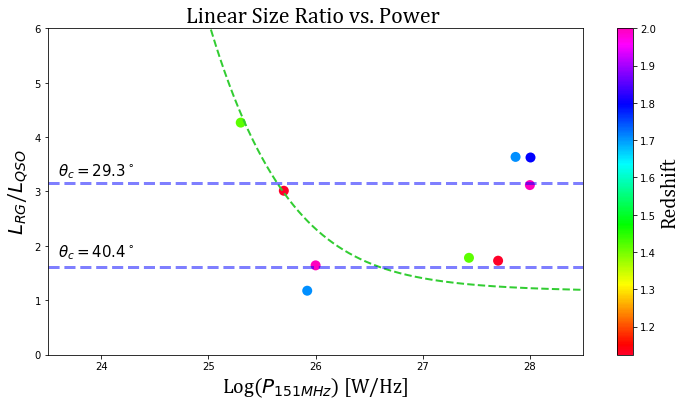

In [334]:
bsfont = {'fontname':'Cambria Math'}

ranges1  = np.linspace(5e25, 1e28, num=21)
rangesz = np.linspace(0.25, 2.00, num=7)

f = plt.figure(figsize=(12,6))
plt.ylabel('$L_{RG}$/$L_{QSO}$', fontsize = 20,**bsfont)
plt.xlabel('Log($P_{151MHz}$) [W/Hz]', fontsize=20,**bsfont)

plt.title('Linear Size Ratio vs. Power ',fontsize=22,**bsfont)
#plt.errorbar(np.log10(np.linspace(1e28, 1e29, num=7)),P28_30,yerr=e_bin3,c = 'royalblue',fmt='o',alpha=0.7)
#plt.errorbar(np.log10(np.linspace(1e26, 1e28, num=7)),P26_28,yerr=e_bin2,xerr=e_P_bin3,c = 'royalblue',fmt='o',alpha=0.7)
#plt.errorbar(np.log10(np.linspace(1e24, 1e26, num=7)),P24_26,yerr=e_bin1,xerr=e_P_bin3,c = 'royalblue',fmt='o',alpha=0.7)

val = plt.scatter(np.log10(P24),ratio1,c=ZZ,s=100,cmap='gist_rainbow',lw=0)
plt.scatter(np.log10(P26),ratio2,c=ZZ,s=100,cmap='gist_rainbow',lw=0)
plt.scatter(np.log10(1e28),Ratio3,c='blue',s=100,cmap='gist_rainbow',lw=0)
cbar = plt.colorbar(val)
cbar.ax.set_ylabel('Redshift',fontsize=20,**bsfont)
plt.plot(np.log10(L_low_f),receding_ratio,lw=2,linestyle="--",c='limegreen')
plt.text(23.6,3.3, r'$\theta_c=29.3^\circ$',fontsize = 15,**bsfont)
plt.text(23.6,1.8, r'$\theta_c=40.4^\circ$',fontsize = 15,**bsfont)
plt.axhline(y= 3.1480,lw=3,linestyle="--",c='blue',alpha=0.5)
plt.axhline(y= 1.6014,lw=3,linestyle="--",c='blue',alpha=0.5)
plt.xlim(23.5,28.5)
plt.ylim(0,6)
plt.savefig('L vs. P:method2.png')
plt.show()

In [311]:
L_0 = 1.5e26

def q_frac(L,theta):
    fraction = 1-((1+(L/L_0)*(np.tan(theta)**2)))**(-0.5)
    return fraction

In [312]:
frac = q_frac(L_low_f,np.radians(38.43))
theta_pred = np.arccos(1-frac)
fs_rg = np.arccos(np.cos(theta_pred)/2)
fs_qso = np.arccos((1+np.cos(theta_pred))/2)
receding_ratio = np.sin(fs_rg)/np.sin(fs_qso)

(24, 28)

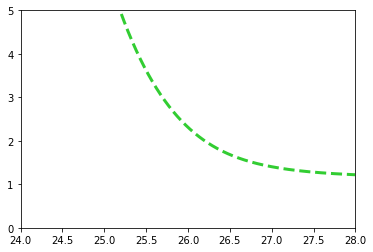

In [314]:
plt.plot(np.log10(L_low_f),receding_ratio,lw=3,linestyle="--",c='limegreen')
plt.plot(np.log10(L_low_f),np.log10(1/(L_low_f)**2),lw=2,linestyle="--",c='black')
plt.ylim(0,5)
plt.xlim(24,28)